#1. PROBLEM STATEMENT

###Defining the question

A necessity has arisen for a model that can predict the scores of a match up between two different soccer teams based on the past matches played by the teams. A model shall be made that can predict the outcome of a match of two teams is required for a company.

###Metric of success

Ability to predict scores

###Context

The ranking of the teams is done using a points system that is determined by the following [document.](https://img.fifa.com/image/upload/edbm045h0udbwkqew35a.pdf)

A potential issue may arise due to the dispersion of the point within the ranking system. The points difference between two teams that are consecutive on the ranking system may vary. This is; the points between the first and second team may be a single point while the second and the third forty points. 

###Approptiateness if available data

#DATA PROCESSING

##Prerequisites

Loading the libraries that shall be used in this project.

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

##Reading the data

Loading the data from the provided datasets

In [327]:
with open('/content/fifa_ranking.csv', 'r') as d:
  ranking = pd.read_csv(d)

In [328]:
with open('/content/results.csv' , 'r') as f:
  results = pd.read_csv(f)

##Checking the data

Previewing the datasets and getting a general view of what they entail.

In [329]:
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [330]:
ranking.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [331]:
results.shape

(40839, 9)

In [332]:
ranking.shape

(57793, 16)

In [333]:
ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [334]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [335]:
#Changing the date and the time of the dataset to an object that
# the programming will allow for manipulation.

ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [336]:
#Changing the date and the time of the dataset to an object that
# the programming will allow for manipulation.

results['date'] = pd.to_datetime(results['date'])

##External Data Source Validation

An assumption in made that will be investigated here that the ranking is much more placement on a list rather than the metric on the teams strength within the dataset. This shall be investigated by the maximum value on the list of every year of the ranking dataset. 

Also the context; here meaning the number of years that are within our datasets records can be found.

In [337]:
foryear = ranking.copy()

In [338]:
foryear['year']= ''
for r ,row in foryear.iterrows():
  t = foryear.loc[r , 'rank_date']
  foryear.loc[r, 'year'] = t.strftime('%Y')

In [339]:
foryear.groupby(['year']).max()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
year,,,,,,,,,,,,,,,,
1993,167,Zimbabwe,ZIM,0.00,59,53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1993-12-23
1994,176,Zimbabwe,ZIM,0.00,66,92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1994-12-20
1995,180,Zimbabwe,ZIM,0.00,68,72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1995-12-19
1996,188,Zimbabwe,ZIM,0.00,69,65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1996-12-18
1997,192,Zimbabwe,ZIM,0.00,72,33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1997-12-23
1998,198,Zimbabwe,ZIM,0.00,73,53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1998-12-23
1999,202,Zimbabwe,ZIM,0.00,842,32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,1999-12-22
2000,203,Zimbabwe,ZIM,0.00,839,32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2000-12-20
2001,203,Zimbabwe,ZIM,0.00,821,25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2001-12-19


From the above we can see that the lowest rank (rank with the highest number) is simillar to the information about the datasets from this [link](https://www.fifa.com/fifa-world-ranking/ranking-table/men/) to the FIFA website to which the data originated.

##Data Preparation

Here the data shall be prepared for use in the building of the models.

In [340]:
res = results.copy()
rank = ranking.copy()

###Duplicates and Nulls

In [341]:
res.duplicated().sum()

0

In [342]:
rank.duplicated().sum()

37

In [343]:
rank.drop_duplicates(inplace = True)

###Prepairing

In [344]:
#A new column year is created since ranking is done annualy and the year the
#team is ranked is indicated by the record of the ranking 

rank['year']= ''
for r ,row in rank.iterrows():
  t = rank.loc[r , 'rank_date']
  rank.loc[r, 'year'] = t.strftime('%Y')

In [345]:
ye = rank['year'].unique()
co = rank['country_full'].unique()

In [346]:
#Creating a new dataframe with the year of ranking as columns and the country as
#index to see the gradual change in ranking over time of each team

rot = pd.DataFrame(columns= ye, index = co)

In [347]:
#Filling in of the dataframe that has been created in the previous cell from the 
#ranking dataset

for e , rows in rot.iterrows():
  y = rank[rank['country_full'] == e]
  for u , row2 in y.iterrows():
    rot.loc[e , row2['year']] = row2['rank']

In [348]:
rot

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Germany,1,5,2,2,2,3,5,11,12,4,12,19,16,6,5,2,6,3,3,2,2,1,4,3,1,1
Italy,2,4,3,10,9,7,14,4,6,13,10,10,12,2,3,4,4,14,9,4,7,11,15,16,14,19
Switzerland,12,7,18,47,62,83,47,58,63,44,44,51,35,17,44,24,18,22,17,12,8,12,12,11,8,6
Sweden,9,3,13,17,18,18,16,23,16,25,19,13,14,14,24,32,42,33,18,20,27,44,35,41,18,24
Argentina,8,10,7,22,17,5,6,3,2,5,5,3,4,3,1,6,8,5,10,3,3,2,2,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172,112,74,25,51,31,52,59,85,63,46,43
Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151,177,178,158,151,75,83,81
South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199,201,189,138,168,153,156
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165,177,141


In [349]:
#A new column year is created to match the teams that played to the ranking that
#attained within that year

res['year']= ''
for r ,row in res.iterrows():
  t = res.loc[r , 'date']
  res.loc[r, 'year'] = t.strftime('%Y')

In [350]:
res.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878


In [351]:
#Merging of the resulting datasets

col = rot.columns

q = 0
for y in col:
  sm = res[res['year'] == y]
  grank = pd.DataFrame(rot[y])
  grank.columns = ['home rank']
  sm = pd.merge(sm, grank,left_on = 'home_team', right_index = True) 
  grank = pd.DataFrame(rot[y])
  grank.columns = ['away rank']
  sm = pd.merge(sm, grank,left_on = 'away_team', right_index = True)
  if q == 0:
    tal = sm
    q = 1
  tal = pd.concat([tal , sm])

In [352]:
tal.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,home rank,away rank
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,37,70
17833,1993-07-04,Gabon,Mali,0,2,Friendly,Moanda,Gabon,False,1993,60,70
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,127,70
18079,1993-12-03,Sierra Leone,Mali,2,0,Amílcar Cabral Cup,Freetown,Sierra Leone,False,1993,76,70
18067,1993-11-27,Senegal,Mali,0,1,Amílcar Cabral Cup,Freetown,Sierra Leone,True,1993,56,70
17534,1993-04-09,Egypt,Mali,2,1,African Cup of Nations qualification,Cairo,Egypt,False,1993,26,70
17604,1993-04-25,Morocco,Mali,1,0,African Cup of Nations qualification,Casablanca,Morocco,False,1993,30,70
17964,1993-09-15,Morocco,Mali,3,0,Friendly,Casablanca,Morocco,False,1993,30,70
18080,1993-12-05,Gambia,Mali,2,0,Amílcar Cabral Cup,Freetown,Sierra Leone,True,1993,125,70
17390,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,37,81


##Tidying

The resulting datasets from the above process shall be cleaned and anomalies sought.

In [353]:
randr = tal.copy()
chron = rot.copy()

In [354]:
randr.shape

(19205, 12)

In [355]:
chron.shape

(216, 26)

###Anomalies

In [356]:
randr.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                  object
home rank             object
away rank             object
dtype: object

In [357]:
chron.dtypes

1993    object
1994    object
1995    object
1996    object
1997    object
1998    object
1999    object
2000    object
2001    object
2002    object
2003    object
2004    object
2005    object
2006    object
2007    object
2008    object
2009    object
2010    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
dtype: object

In [358]:
randr['home rank'] = pd.to_numeric(randr['home rank'])
randr['away rank'] = pd.to_numeric(randr['away rank'])
randr.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                  object
home rank            float64
away rank            float64
dtype: object

In [359]:
tn = chron.columns
for z in tn:
  chron[z] = pd.to_numeric(chron[z])

chron.dtypes

1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

No anomalies found as to the conversion happened seemlessly

###Outlies

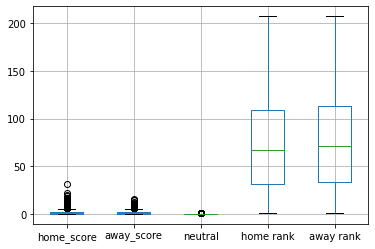

In [360]:
randr.boxplot()

In [361]:
randr[randr['home_score'] > 15]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,home rank,away rank
21552,1998-09-28,Australia,Cook Islands,16,0,Oceania Nations Cup,Brisbane,Australia,False,1998,39.0,173.0
22465,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True,2000,75.0,199.0
23443,2000-11-26,Tajikistan,Guam,16,0,FIFA World Cup qualification,Tabriz,Iran,True,2000,134.0,199.0
22552,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False,2000,74.0,201.0
23019,2000-06-19,Australia,Cook Islands,17,0,Oceania Nations Cup,Papeete,French Polynesia,True,2000,73.0,170.0
23781,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,48.0,201.0
23778,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,2001,48.0,173.0
32507,2010-10-14,Dominican Republic,British Virgin Islands,17,0,CFU Caribbean Cup qualification,San Cristóbal,Dominican Republic,False,2010,168.0,176.0


In [362]:
randr['home_score'].quantile(0.75)

2.0

In [363]:
randr['home_score'].quantile(0.25)

0.0

In [364]:
#todrop = ['home_score', 'away_score']
#for m in todrop:
#  qh3 = ti[m].quantile(0.75)
#  qh1 = ti[m].quantile(0.75)
#  dropped = ti[ti[m] < qh3]
#  dropped = dropped[dropped[m] > qh1]
#  ti =dropped
#  print(qh3)
#  print(qh1)

Outliers are retained within the datasets since they portray the extremes of the scoring of the teams.

##Descriptive columns

In [365]:
randr['status'] = ''

In [366]:
#Creation of a new column to describe the result of match using win, lose or draw.

for a , row in randr.iterrows():
  if row['home_score'] > row['away_score']:
    randr.loc[a , 'status'] = 'Win'
  elif row['home_score'] < row['away_score']:
    randr.loc[a , 'status'] = 'Lose'
  else:
    randr.loc[a , 'status'] = 'Draw'

In [367]:
randr.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,home rank,away rank,status
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,37.0,70.0,Draw
17833,1993-07-04,Gabon,Mali,0,2,Friendly,Moanda,Gabon,False,1993,60.0,70.0,Lose
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Libreville,Gabon,True,1993,127.0,70.0,Win
18079,1993-12-03,Sierra Leone,Mali,2,0,Amílcar Cabral Cup,Freetown,Sierra Leone,False,1993,76.0,70.0,Win
18067,1993-11-27,Senegal,Mali,0,1,Amílcar Cabral Cup,Freetown,Sierra Leone,True,1993,56.0,70.0,Lose
17534,1993-04-09,Egypt,Mali,2,1,African Cup of Nations qualification,Cairo,Egypt,False,1993,26.0,70.0,Win
17604,1993-04-25,Morocco,Mali,1,0,African Cup of Nations qualification,Casablanca,Morocco,False,1993,30.0,70.0,Win
17964,1993-09-15,Morocco,Mali,3,0,Friendly,Casablanca,Morocco,False,1993,30.0,70.0,Win
18080,1993-12-05,Gambia,Mali,2,0,Amílcar Cabral Cup,Freetown,Sierra Leone,True,1993,125.0,70.0,Win
17390,1993-01-23,Ghana,Niger,4,0,Friendly,Kumasi,Ghana,False,1993,37.0,81.0,Win


In [368]:
#Changing of the tournament labels to accomodate for the necessary data processing

for a , row in randr.iterrows():
  if row['tournament'] == 'Friendly':
    randr.loc[a , 'tournament'] = 'friendly'
  elif row['tournament'] == 'FIFA World Cup':
    randr.loc[a , 'tournament'] = 'worldcup'
  else:
    randr.loc[a , 'tournament'] = 'other'

In [369]:
randr.drop(columns=['date', 'city','country','neutral'], inplace= True)

In [370]:
randr.head(10)

,home_team,away_team,home_score,away_score,tournament,year,home rank,away rank,status
17361,Ghana,Mali,1,1,friendly,1993,37.0,70.0,Draw
17833,Gabon,Mali,0,2,friendly,1993,60.0,70.0,Lose
17364,Burkina Faso,Mali,1,0,friendly,1993,127.0,70.0,Win
18079,Sierra Leone,Mali,2,0,other,1993,76.0,70.0,Win
18067,Senegal,Mali,0,1,other,1993,56.0,70.0,Lose
17534,Egypt,Mali,2,1,other,1993,26.0,70.0,Win
17604,Morocco,Mali,1,0,other,1993,30.0,70.0,Win
17964,Morocco,Mali,3,0,friendly,1993,30.0,70.0,Win
18080,Gambia,Mali,2,0,other,1993,125.0,70.0,Win
17390,Ghana,Niger,4,0,friendly,1993,37.0,81.0,Win


#Exploratory Data Analysis

In [371]:
rr = randr.copy()
ch = chron.copy()

In [372]:
rr.dropna(inplace= True)

###Graphs

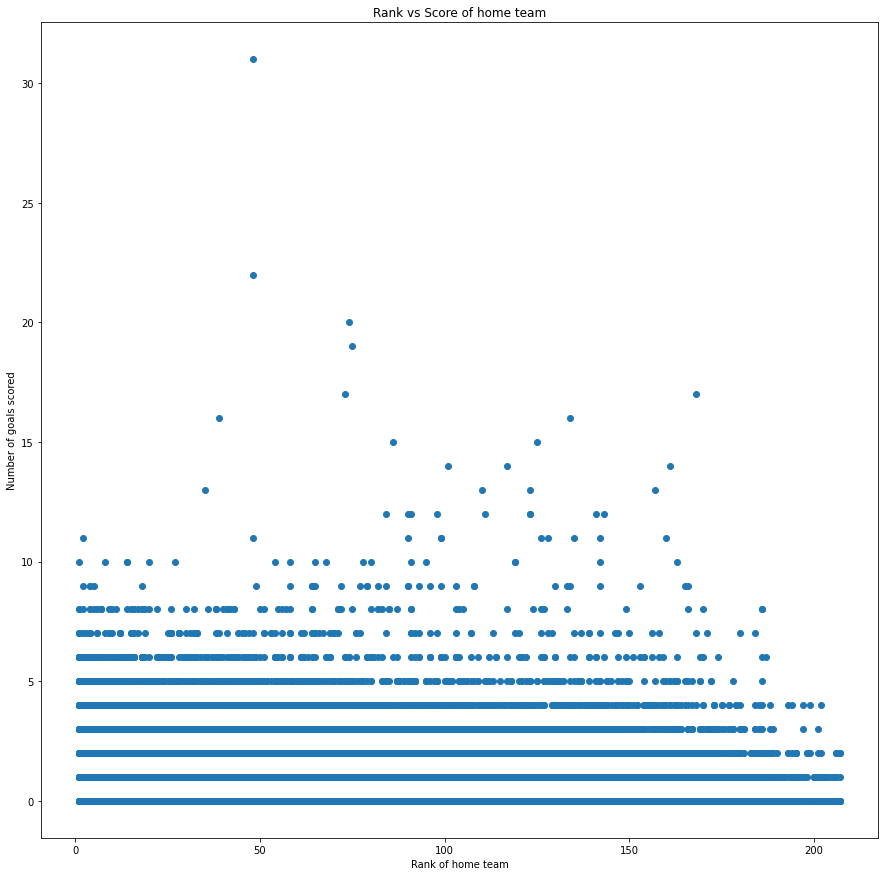

In [373]:
#A graph of rank vs score of the home team

plt.figure(figsize=(15,15))

plt.title('Rank vs Score of home team')
plt.xlabel('Rank of home team')
plt.ylabel('Number of goals scored')

plt.scatter(rr['home rank'],rr['home_score'])
plt.show()

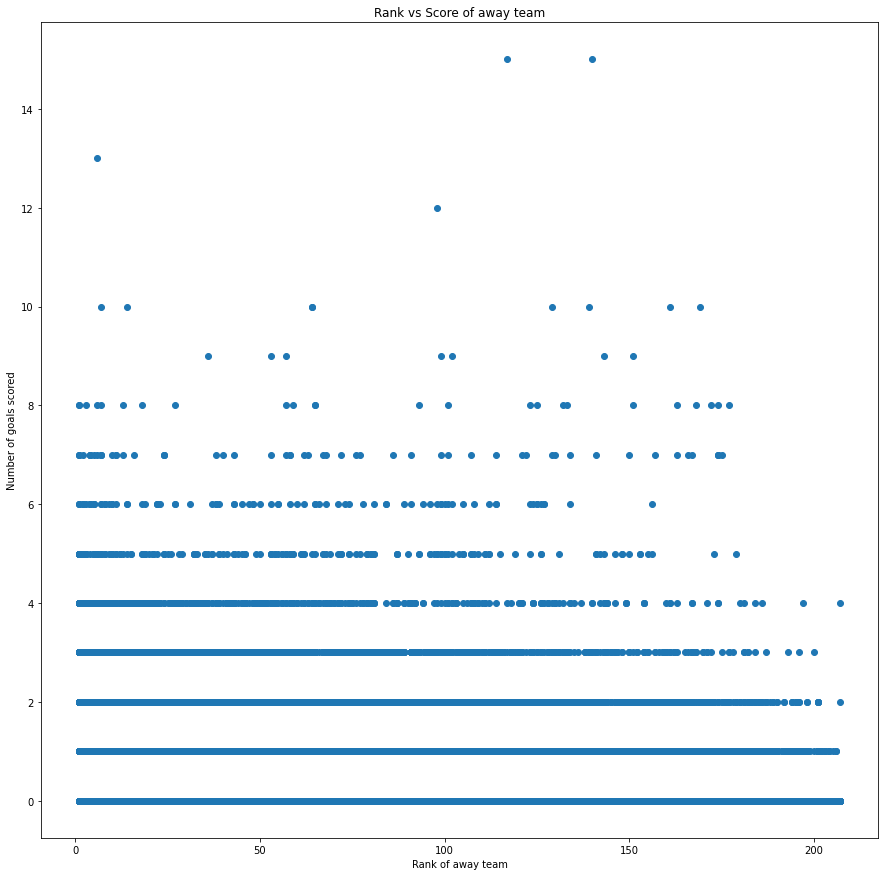

In [374]:
#A graph of rank vs score of the away team

plt.figure(figsize=(15,15))

plt.title('Rank vs Score of away team')
plt.xlabel('Rank of away team')
plt.ylabel('Number of goals scored')

plt.scatter(rr['away rank'],rr['away_score'])

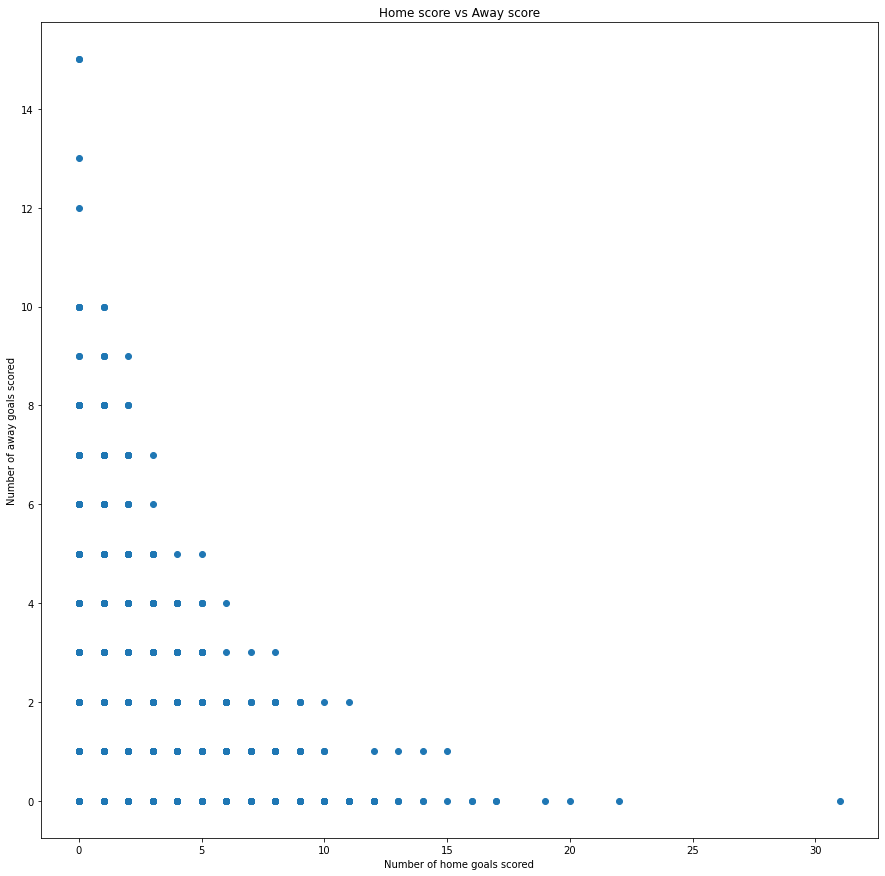

In [375]:
##A graph of away team scores vs home team scores

plt.figure(figsize=(15,15))

plt.title('Home score vs Away score')
plt.xlabel('Number of home goals scored')
plt.ylabel('Number of away goals scored')

plt.scatter(rr['home_score'],rr['away_score'])

From the graph above, some predictive properties can be found since the graph above closely resembles the line y = x^-1 with its boundary. This has potential to be used.

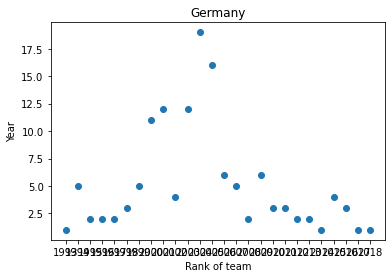

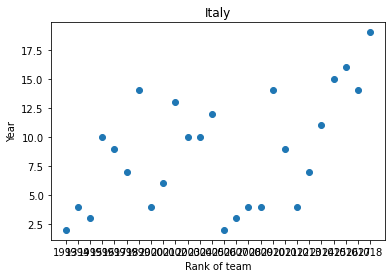

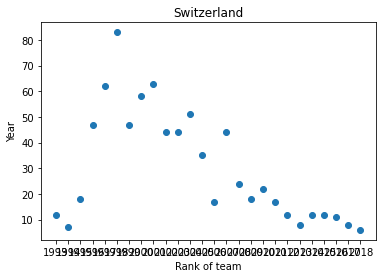

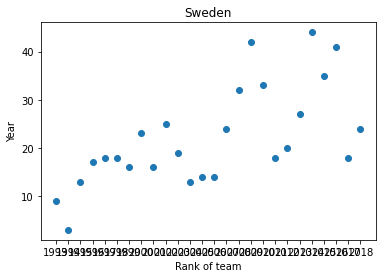

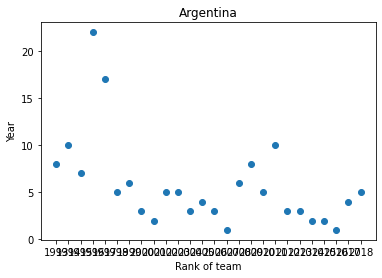

In [376]:
#Graphs of the rank of different teams over the time period spanning the 
#ranked data dataset

countries = ch.index

for g in range(0,5):
  plt.scatter(ch.columns,ch.loc[countries[g]])
  plt.title(countries[g])
  plt.xlabel('Rank of team')
  plt.ylabel('Year')
  plt.show()

The points in the above graphs show predictive properties with a regressive line representing the points

In [377]:
#More columns are made on the dataset that show the absolute difference between 
#some of the columns within the dataset.

rr['deltascore'] = abs(rr['away_score'] - rr['home_score'])
rr['deltarank'] = abs(rr['away rank'] - rr['home rank'])
rr['difscore'] = (rr['home_score'] - rr['away_score'])
rr['difrank'] = (rr['home rank'] - rr['away rank'])

Following the graphs above having either a small range between the points. Further research is done; [link](https://en.wikipedia.org/wiki/FIFA_World_Rankings) that shows some teams retain their rank stronger than others which prompts the investigation of the difference in rank and difference in goal number.

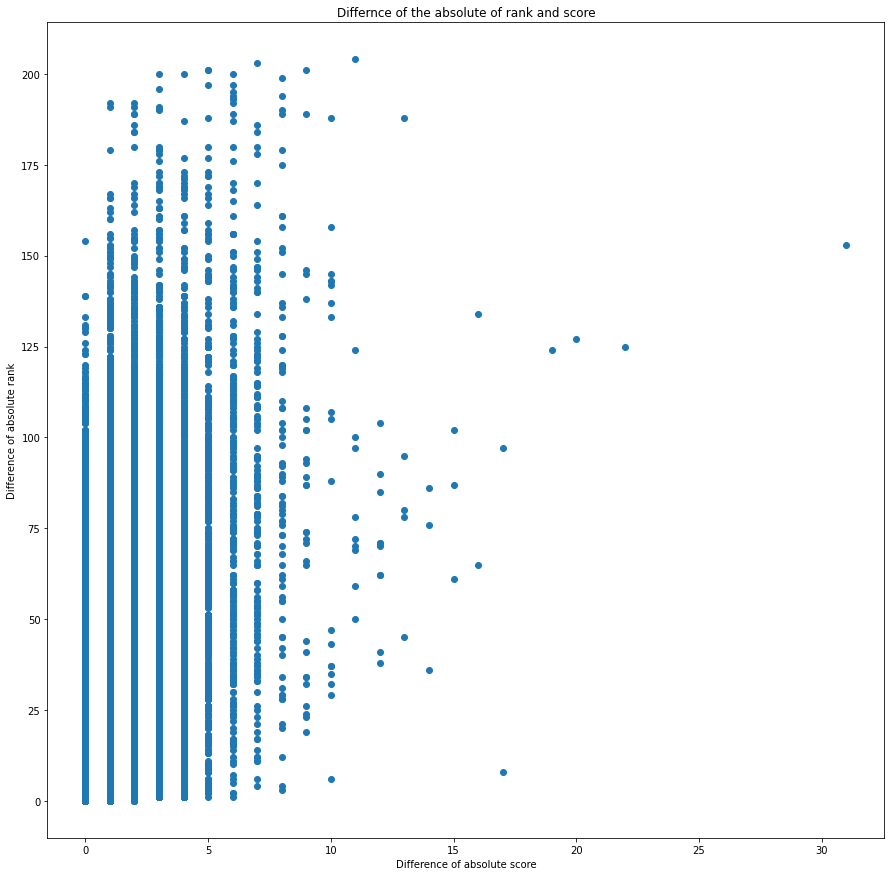

In [378]:
##A graph of the absolute difference of rank and score

plt.figure(figsize=(15,15))

plt.title('Differnce of the absolute of rank and score')
plt.xlabel('Difference of absolute score')
plt.ylabel('Difference of absolute rank')

plt.scatter(rr['deltascore'],rr['deltarank'])

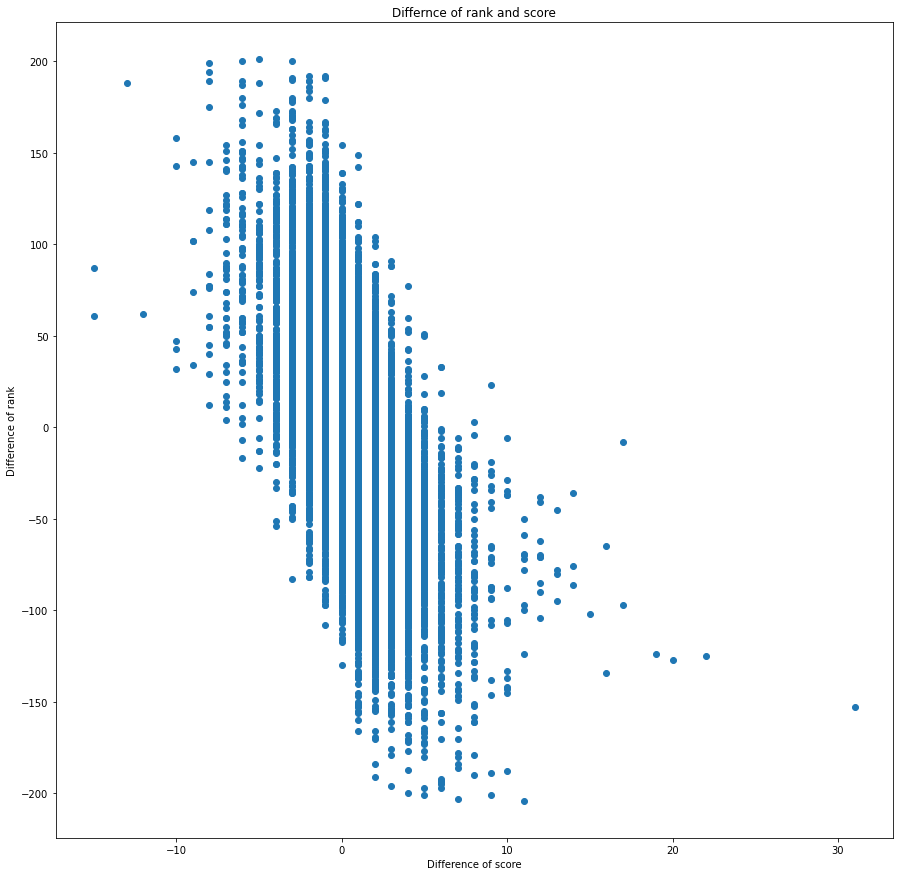

In [379]:
#The difference of rank against the difference in score

plt.figure(figsize=(15,15))

plt.title('Differnce of rank and score')
plt.xlabel('Difference of score')
plt.ylabel('Difference of rank')

plt.scatter(rr['difscore'],rr['difrank'])

The points on the graph above seem to be biased on the 2nd quadrant and the 4th quadrant of the graph which should have a bit of correlation.

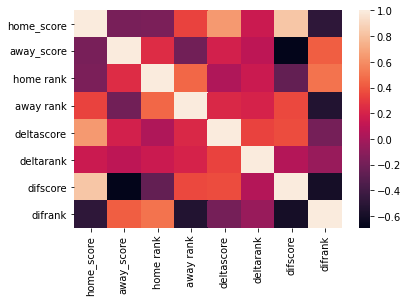

In [380]:
#Checking for correlation of the columns

sb.heatmap(rr.corr()) 

Since on the search of outliers the home score and away score of 0 appeared within the quadrants the correlation between either the home score or away score to the difference in score is ignored.

In [381]:
#Confirmation on the correlation between the difference in score and 
#the difference in rank

rr['difrank'].corr(rr['difscore'])

-0.5972071273573477

#Feature Engineering

###Actual differences model

A model is built of regression between the difference in rank and the difference in score due to their correlation

In [382]:
from sklearn.model_selection import train_test_split

X = rr['difrank'].values.reshape(-1,1)
y = rr['difscore'].values.reshape(-1,1)

ds_train, ds_test, dr_train, dr_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [383]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(ds_train, dr_train)

print(regressor.intercept_)
print(regressor.coef_)

[0.44763722]
[[-0.02520718]]


In [384]:
ds_predict = regressor.predict(dr_test)

comparison_frame = pd.DataFrame({'Actual': ds_test.flatten(), 'Predicted': ds_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,5684.000000,5684.000000
mean,-2.938424,0.433858
std,52.544645,0.056144
min,-204.000000,-0.333785
25%,-36.000000,0.397223
50%,-4.000000,0.447637
75%,28.000000,0.472844
max,201.000000,0.825745


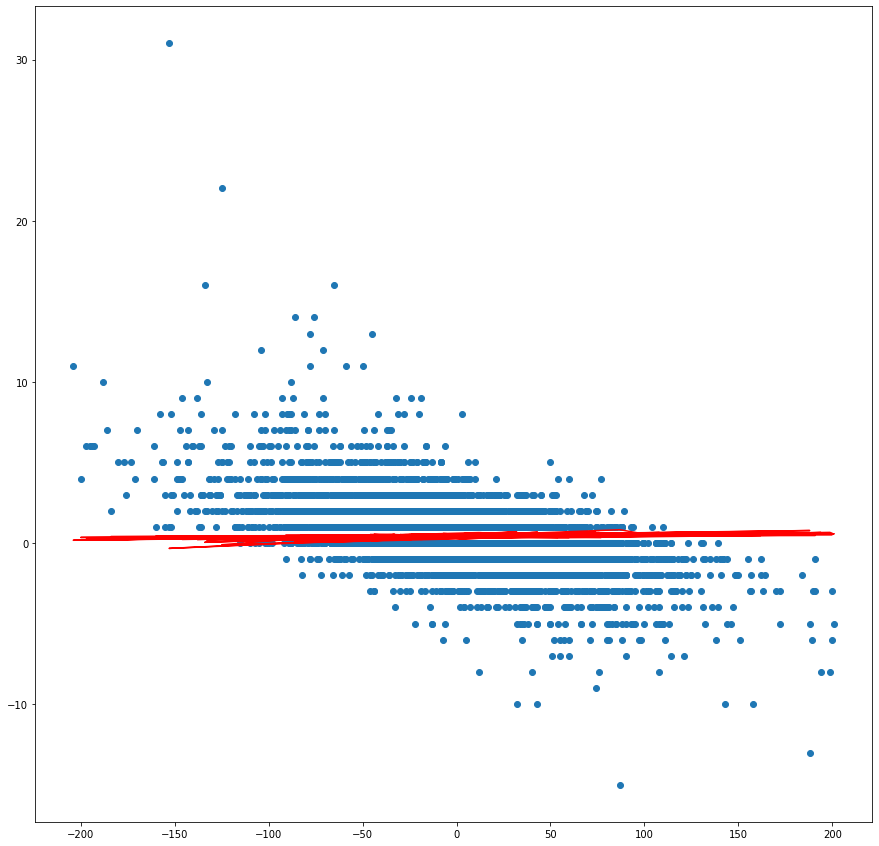

In [385]:
plt.figure(figsize=(15,15))
plt.scatter(ds_test, dr_test)
plt.plot(ds_test, ds_predict, color='red')
plt.show()

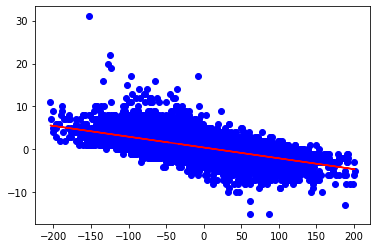

In [386]:
reg1 = LinearRegression()

reg1.fit(X, y)
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg1.predict(X), color='red')

In [387]:
print(reg1.intercept_)
print(reg1.coef_)

[0.45529924]
[[-0.02515277]]


###Home scores and Away scores model

Models are built based on the observation of the away scores and the home score graph. A polynomial line is used to try represent the away model when away team is winning and another is used for the home model when the home team is winning.

####Away model

In [388]:
from sklearn.preprocessing import PolynomialFeatures

In [389]:
X = rr['away_score'].values.reshape(-1,1)
y = rr['home_score'].values.reshape(-1,1)

hs_train, hs_test, as_train, as_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [390]:
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)

In [391]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

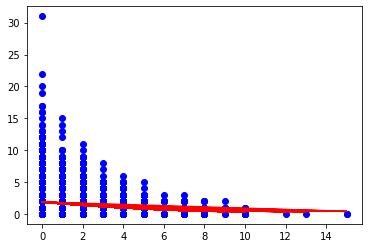

In [392]:
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')

####Home model

In [393]:
from sklearn.preprocessing import PolynomialFeatures

In [394]:
X = rr['home_score'].values.reshape(-1,1)
y = rr['away_score'].values.reshape(-1,1)

hs_train, hs_test, as_train, as_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [395]:
poly_reg3 = PolynomialFeatures(degree = 2) 
X_poly2 = poly_reg3.fit_transform(X)

In [396]:
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

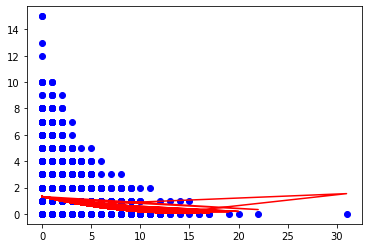

In [397]:
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg3.predict(X_poly2), color='red')

###Chronological spread of the team ranks

For this dataset the data shall be biased to 1992 so that the first year of ranking available to analyse (1993) appears as 1 all the way to the last year

In [398]:
yearcol = ch.columns
yearcol = yearcol.astype(int)

In [399]:
yearcol = yearcol - 1992

In [400]:
ch.columns = yearcol

In [401]:
ch.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Germany,1.0,5.0,2.0,2.0,2.0,3.0,5.0,11.0,12.0,4.0,12.0,19.0,16.0,6.0,5.0,2.0,6.0,3.0,3.0,2.0,2.0,1.0,4.0,3.0,1.0,1.0
Italy,2.0,4.0,3.0,10.0,9.0,7.0,14.0,4.0,6.0,13.0,10.0,10.0,12.0,2.0,3.0,4.0,4.0,14.0,9.0,4.0,7.0,11.0,15.0,16.0,14.0,19.0
Switzerland,12.0,7.0,18.0,47.0,62.0,83.0,47.0,58.0,63.0,44.0,44.0,51.0,35.0,17.0,44.0,24.0,18.0,22.0,17.0,12.0,8.0,12.0,12.0,11.0,8.0,6.0
Sweden,9.0,3.0,13.0,17.0,18.0,18.0,16.0,23.0,16.0,25.0,19.0,13.0,14.0,14.0,24.0,32.0,42.0,33.0,18.0,20.0,27.0,44.0,35.0,41.0,18.0,24.0
Argentina,8.0,10.0,7.0,22.0,17.0,5.0,6.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,1.0,6.0,8.0,5.0,10.0,3.0,3.0,2.0,2.0,1.0,4.0,5.0
Republic of Ireland,10.0,9.0,28.0,36.0,47.0,56.0,35.0,31.0,17.0,14.0,14.0,12.0,24.0,49.0,35.0,38.0,35.0,36.0,22.0,42.0,67.0,64.0,31.0,23.0,32.0,31.0
Russia,14.0,13.0,5.0,7.0,12.0,40.0,18.0,21.0,21.0,23.0,24.0,32.0,34.0,22.0,23.0,9.0,12.0,13.0,12.0,9.0,22.0,31.0,24.0,56.0,64.0,70.0
Brazil,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,4.0,6.0,18.0,10.0,6.0,6.0,2.0,2.0,2.0
Norway,4.0,8.0,10.0,14.0,13.0,14.0,7.0,14.0,26.0,26.0,42.0,35.0,38.0,50.0,29.0,59.0,32.0,12.0,25.0,24.0,54.0,67.0,54.0,83.0,59.0,53.0
Denmark,6.0,14.0,9.0,6.0,8.0,19.0,11.0,22.0,18.0,12.0,13.0,14.0,13.0,21.0,31.0,37.0,28.0,28.0,11.0,23.0,25.0,30.0,42.0,46.0,12.0,12.0


#Multicollinearity

Multicollinearity is checked within the results and ranking dataset

In [402]:
co = rr.corr()
co

,home_score,away_score,home rank,away rank,deltascore,deltarank,difscore,difrank
home_score,1.000000,-0.170400,-0.162536,0.336294,0.647318,0.152780,0.829861,-0.481669
away_score,-0.170400,1.000000,0.250020,-0.198545,0.188501,0.097634,-0.691219,0.430841
home rank,-0.162536,0.250020,1.000000,0.459635,0.037109,0.154209,-0.260773,0.503592
away rank,0.336294,-0.198545,0.459635,1.000000,0.228535,0.201068,0.359055,-0.535806
deltascore,0.647318,0.188501,0.037109,0.228535,1.000000,0.333658,0.367985,-0.187036
deltarank,0.152780,0.097634,0.154209,0.201068,0.333658,1.000000,0.056759,-0.048987
difscore,0.829861,-0.691219,-0.260773,0.359055,0.367985,0.056759,1.000000,-0.597207
difrank,-0.481669,0.430841,0.503592,-0.535806,-0.187036,-0.048987,-0.597207,1.000000


In [403]:
pd.DataFrame(np.linalg.inv(co.values), index = co.index , columns = co.columns)

,home_score,away_score,home rank,away rank,deltascore,deltarank,difscore,difrank
home_score,2.027096e+12,-1.565166e+12,-3.029373e+11,3.099696e+11,-0.455087,0.113723,-2.764079e+12,3.186401e+11
away_score,-1.565166e+12,1.208499e+12,2.339046e+11,-2.393344e+11,-1.417147,0.005028,2.134206e+12,-2.460291e+11
home rank,-3.197671e+11,2.468993e+11,5.218788e+13,-5.339936e+13,-0.763670,-0.066097,4.360235e+11,-5.489306e+13
away rank,3.271901e+11,-2.526307e+11,-5.339936e+13,5.463897e+13,0.680101,-0.154537,-4.461452e+11,5.616734e+13
deltascore,-4.549193e-01,-1.417277e+00,-7.544273e-01,6.706434e-01,2.238875,-0.443218,-1.439301e+00,6.682362e-01
deltarank,1.136896e-01,5.053795e-03,-6.771653e-02,-1.528796e-01,-0.443218,1.168868,4.767531e-02,7.604338e-03
difscore,-2.764079e+12,2.134206e+12,4.130749e+11,-4.226639e+11,-1.439072,0.047630,3.769003e+12,-4.344867e+11
difrank,3.363423e+11,-2.596973e+11,-5.489306e+13,5.616734e+13,0.677958,0.005901,-4.586249e+11,5.773846e+13


#Building on a model

The model shall be used to predict the rank of the team within the coming itteration of ranking. This in turn shall be used to predict the goad difference between the two teams which shall then be used to predict the actual goals scored using the away vs home scores model.

In [404]:
def get_rank (team):
  from sklearn.preprocessing import PolynomialFeatures

  y2 = ch.loc[team].values.reshape(-1, 1)
  X2 = ch.columns.values.reshape(-1, 1)

  #hs_train, hs_test, as_train, as_test = train_test_split(X, y, test_size=0.3, random_state=1)
  for wert in range (1, int(len(ch.columns) / 4)):
    poly_reg10 = PolynomialFeatures(degree = wert) 
    X_poly10 = poly_reg10.fit_transform(X2)

    pol_reg30 = LinearRegression()
    pol_reg30.fit(X_poly10, y2)

    n = 0

    for tyu in range (1,28):
      b = pol_reg30.predict(poly_reg10.fit_transform([[tyu]]))
      b = b[0,0]
      if b <= 0:
        n = 1
    
    if n == 1:
      continue

    ert = pol_reg30.predict(poly_reg10.fit_transform([[27]]))
    ert2 = pol_reg30.predict(poly_reg10.fit_transform([[28]]))
    ert = ert[0,0]
    ert2 = ert2[0,0]

  plt.scatter(X2, y2) 
  plt.plot(X2, pol_reg30.predict(X_poly10), color='red')
  plt.title(team)
  plt.show()
  return (int(round(ert)),int(round(ert2)))

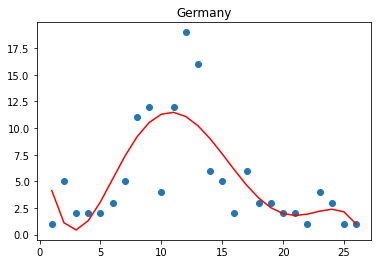

(7, 12)

In [405]:
get_rank('Germany')

#2. PREDICTIONS

Home team rank predictions


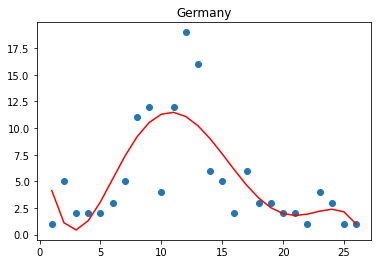

Away team rank predictions


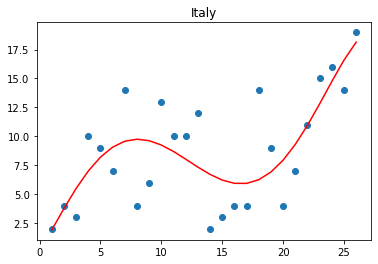

Predicted rank for team Germany this year: 7
Predicted rank for team Germany next year: 12
Predicted rank for team Italy this year: 19
Predicted rank for team Italy next year: 19
Home team is predicted to win by: 1


In [406]:
#Calls on the function that has the model to predict ranks

#h = input('Home team:')
#a = input('Away team:')

h = 'Germany'
a = 'Italy'
print ("Home team rank predictions")
ho = get_rank(h)
print ("Away team rank predictions")
aw = get_rank(a)
print ('Predicted rank for team ' + h + ' this year: %d'  %ho[0])
print ('Predicted rank for team ' + h + ' next year: %d'  %ho[1])
print ('Predicted rank for team ' + a + ' this year: %d'  %aw[0])
print ('Predicted rank for team ' + a + ' next year: %d'  %aw[1])

#projected rank difference
prd = ho[0] - aw[0]

pds = (reg1.predict([[prd]]))

pds = round(pds[0,0])

if pds > 0 :
  print('Home team is predicted to win by: %d' %pds)
elif pds < 0 :
  print('Home team is predicted to lose by: %d' %abs(pds))
else:
  print('Home team is predicted to draw')

#3. CHALLENGE THE SOLUTION

The following can be used to get better insights on the data:
1.   Using the designated point scored by teams to predict the performace.
2.   Using of more data to analyse.
3. Having information on the individual player statistics to try predict the performance of a team.

